# Marangoni convection of a Navier-Stokes fluid in a rectangle

$$
\mathbb{S}=
\begin{cases}
\Omega = [0, L_x] \times [0, 1] & \text{aspect ratio } L_x=\mathcal{O}(1) \\
\textbf{e}_g=-\textbf{e}_y & \text{gravity acting downwards} \\
\tau(\textbf{u})=\tfrac{1}{2}(\nabla\textbf{u} + (\nabla\textbf{u})^{\mathsf{T}}) & \text{constitutive relations} \\
\rho(c)=c \\
\gamma(c)=\gamma_0-Ma\,c \\
c_0(x,y)=\text{exp}\left(-\frac{(y-h)^2}{\epsilon}\right) + \mathcal{N}(x,y) \\
\textbf{u}_0=\textbf{0} \\
p_0=0 \\
c_{\text{N}}\vert_{\partial\Omega}=0 & \text{no-flux on entire boundary} \\
(\textbf{n}\cdot\textbf{u})\vert_{x, y=1}=0 & \text{no-penetration on upper boundary} \\
\boldsymbol{\tau}_{\text{N}}(x,y=1) = -Ma\frac{\partial c}{\partial x}\textbf{e}_x & \text{Marangoni stress on upper boundary} \\
\textbf{u}_{\text{E}}(x=0, y)=\textbf{0} & \text{no-slip and no-penetration on lower, left and right boundaries} \\
\textbf{u}_{\text{E}}(x=L_x, y)=\textbf{0} \\
\textbf{u}_{\text{E}}(x, y=0)=\textbf{0}
\end{cases}
$$

In [ ]:
import numpy as np
from lucifex.sim import run
from lucifex.viz import plot_colormap, plot_streamlines, plot_line, plot_stacked_lines
from lucifex.io import write
from lucifex.utils import finite_element_function_components, maximum, minimum

from py.navier_stokes_marangoni import navier_stokes_marangoni


Lx = 2.0
Ly = 1.0
h = 0.8 * Ly
eps = 0.01 * Ly
Ra = 1e2
Pr = 1e1
Ma = 1e4
simulation = navier_stokes_marangoni(
    Lx=Lx,
    Ly=Ly,    
    Nx=64,
    Ny=64,
    cell='quadrilateral',
    Ra=Ra,
    Pr=Pr,
    Ma=Ma,
    c_base=lambda x: np.exp(-(x[1] - h)**2 / eps),
    noise_eps=1e-3,
    noise_freq=(16, 8),
    dt_max=0.01, 
)

n_stop = 50
dt_init = 1e-6
n_init = 10
run(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

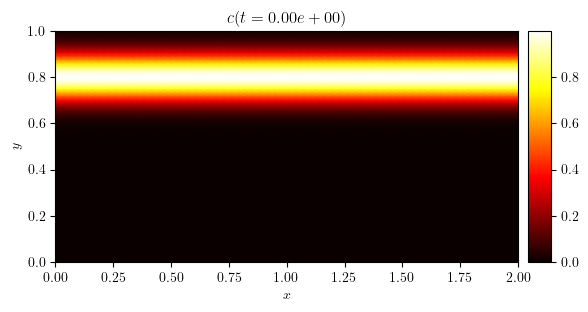

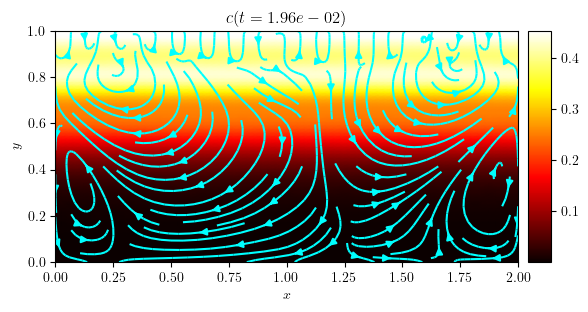

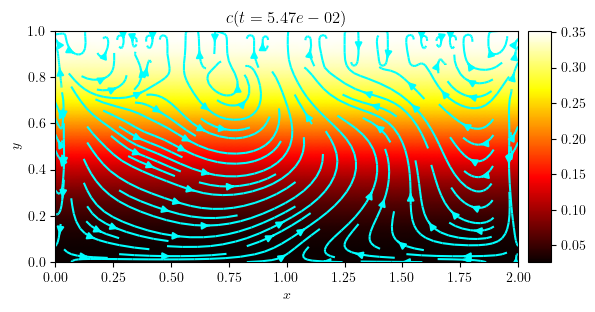

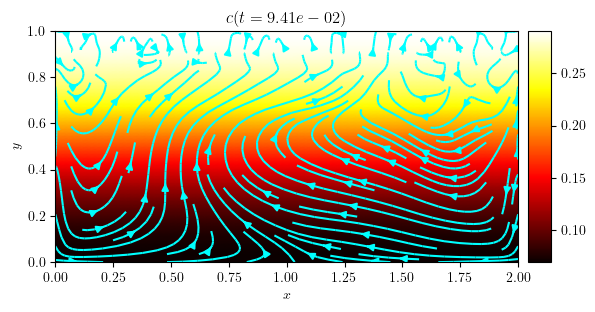

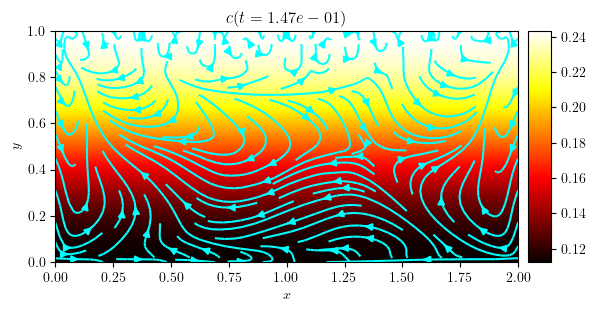

In [ ]:
c, u = simulation['c', 'u']

time_indices = [int(i * len(c.series)) for i in (0.25, 0.5, 0.75)]
for i in (0, *time_indices, -1):
    cn = c.series[i]
    tn = c.time_series[i]
    un = u.series[i]
    ux, uy = finite_element_function_components(('P', 1), un, names=('ux', 'uy'))
    fig, ax = plot_colormap(cn, title=f'$c(t={tn:.2e})$')
    plot_streamlines(fig, ax, (ux, uy), color='cyan')
    write(fig, f'A19_marangoni_convection_c(t={tn:.2e})', './figures', file_ext=['pdf', 'png'], close=False, pickle=False)

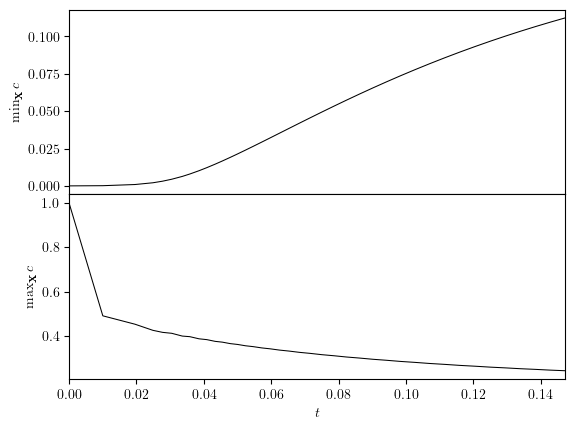

In [3]:
c_min = [minimum(i) for i in c.series]
c_max = [maximum(i) for i in c.series]

fig, ax = plot_stacked_lines(
    [(c.time_series, c_min), (c.time_series, c_max)],
    x_label='$t$',
    y_labels=['$\min_{\\textbf{x}}c$', '$\max_{\\textbf{x}}c$'],
)

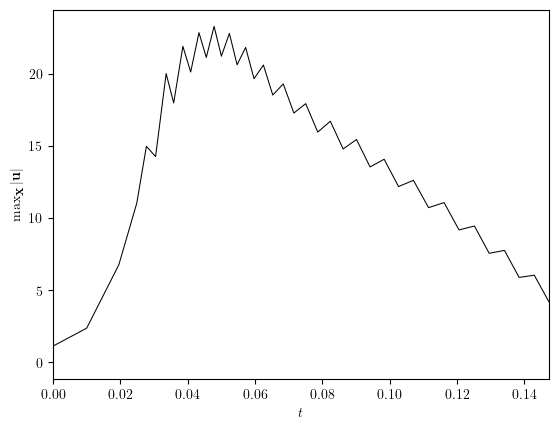

In [4]:
u_max = [maximum(i) for i in u.series]
fig, ax = plot_line((u.time_series, u_max), x_label='$t$', y_label='$\max_{\\textbf{x}}|\\textbf{u}|$')
# write(fig, f'A21_maragoni_convection_umax(t)', './figures', close=False, pickle=False)